In [303]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.svm import SVR
from sklearn.cluster import KMeans
#others
import cartopy.crs as ccrs

In [121]:
# Load the dataset
base_dir = "../dataset"
df_data_original = pd.read_csv(f"{base_dir}/dataset.csv")

# make sure there is no NaN value
assert df_data_original.isnull().values.any() == False

In [122]:
# convert (year, month) into (months) since 1948 Jan to create continuous index
base_year = 1948
df_data_original["cum_months"] = df_data_original.apply(
    lambda x: 
        int(12 * (x["year"] - base_year) + x["month"])
    ,
    axis=1
)

In [233]:
df_data_clean = df_data_original.drop(labels=["year", "lat", "lon"], axis=1)
df_data_clean.head(10)

,skn,month,data_in,Lat_DD,Lon_DD,Lon_DD_updated,air,air.1,hgt,hgt.1,...,pr_wtr,shum,shum.1,shum.2,shum.3,shum.4,shum.5,skt,slp,cum_months
0,1.00,1,3.200000,18.916176,-155.674994,204.325006,295.39603,31.299995,5799.5483,121.48387,...,29.034512,2.592493,-25.859348,0.589191,7.106412,2.945999,9.869999,23.385218,1014.0849,1
1,2.00,1,5.950000,19.108660,-155.825545,204.174455,295.39603,31.299995,5799.5483,121.48387,...,29.034512,2.592493,-25.859348,0.589191,7.106412,2.945999,9.869999,23.385218,1014.0849,1
2,2.20,1,11.500000,19.164740,-155.682280,204.317720,295.39603,31.299995,5799.5483,121.48387,...,29.034512,2.592493,-25.859348,0.589191,7.106412,2.945999,9.869999,23.385218,1014.0849,1
3,2.25,1,5.515941,19.160603,-155.822488,204.177512,295.39603,31.299995,5799.5483,121.48387,...,29.034512,2.592493,-25.859348,0.589191,7.106412,2.945999,9.869999,23.385218,1014.0849,1
4,2.26,1,4.310617,19.225323,-155.778876,204.221124,295.39603,31.299995,5799.5483,121.48387,...,29.034512,2.592493,-25.859348,0.589191,7.106412,2.945999,9.869999,23.385218,1014.0849,1
5,2.34,1,3.000000,19.186302,-155.886763,204.113237,295.39603,31.299995,5799.5483,121.48387,...,29.034512,2.592493,-25.859348,0.589191,7.106412,2.945999,9.869999,23.385218,1014.0849,1
6,3.20,1,10.110000,19.114216,-155.697213,204.302787,295.39603,31.299995,5799.5483,121.48387,...,29.034512,2.592493,-25.859348,0.589191,7.106412,2.945999,9.869999,23.385218,1014.0849,1
7,3.40,1,6.694721,19.127549,-155.757767,204.242233,295.39603,31.299995,5799.5483,121.48387,...,29.034512,2.592493,-25.859348,0.589191,7.106412,2.945999,9.869999,23.385218,1014.0849,1
8,4.00,1,5.080000,19.004216,-155.663882,204.336118,295.39603,31.299995,5799.5483,121.48387,...,29.034512,2.592493,-25.859348,0.589191,7.106412,2.945999,9.869999,23.385218,1014.0849,1
9,4.10,1,3.640000,19.055327,-155.692214,204.307786,295.39603,31.299995,5799.5483,121.48387,...,29.034512,2.592493,-25.859348,0.589191,7.106412,2.945999,9.869999,23.385218,1014.0849,1


In [234]:
Y = np.array(df_data_clean["data_in"])
X = np.array(df_data_clean.drop(labels=["data_in", "skn"], axis=1))

In [235]:
model = LinearRegression()
scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse=False)
X = scaler.fit_transform(X)
# label = encoder.fit_transform(df_data_clean["skn"].to_numpy().reshape(-1,1))

In [236]:
# temp = np.hstack((X, label))

In [237]:
# X = temp
# X.shape

In [259]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=None)

In [260]:
model.fit(Xtrain, Ytrain)
Yhat = model.predict(Xtest)

In [261]:
mse(Ytest, Yhat)

32.81466495131054

# What if we consider a sigle model per station?

In [262]:
df_station_one = df_data_clean[df_data_clean["skn"] == 1]
df_station_one

,skn,month,data_in,Lat_DD,Lon_DD,Lon_DD_updated,air,air.1,hgt,hgt.1,...,pr_wtr,shum,shum.1,shum.2,shum.3,shum.4,shum.5,skt,slp,cum_months
0,1.0,1,3.20,18.916176,-155.674994,204.325006,295.39603,31.299995,5799.5483,121.48387,...,29.034512,2.592493,-25.859348,0.589191,7.106412,2.945999,9.869999,23.385218,1014.08490,1
359,1.0,2,1.33,18.916176,-155.674994,204.325006,294.80408,32.330000,5788.7930,133.86208,...,27.199657,7.456773,-19.957973,5.228316,15.838112,2.857000,9.155001,22.271116,1015.47690,2
712,1.0,3,2.31,18.916176,-155.674994,204.325006,294.97820,32.189995,5801.8066,143.29033,...,31.619999,-0.286887,-75.183790,0.860660,8.627603,3.586000,10.271000,22.553074,1016.62714,3
1067,1.0,4,3.23,18.916176,-155.674994,204.325006,295.79654,29.920006,5829.8667,134.83333,...,32.350327,0.527679,-44.071280,-1.160946,8.856949,3.518000,10.671000,23.421500,1015.43164,4
1421,1.0,5,1.14,18.916176,-155.674994,204.325006,296.50006,29.710007,5857.9033,144.38710,...,31.281930,-11.553710,-103.509090,-3.594981,-6.201051,2.261000,11.924999,24.446610,1016.57830,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170420,1.0,4,0.23,18.916176,-155.674994,204.325006,295.88340,30.219994,5854.1000,164.33333,...,24.795328,-5.883221,-68.650500,-0.014962,-10.520789,1.497000,10.627001,23.959173,1018.88380,712
170797,1.0,5,0.23,18.916176,-155.674994,204.325006,296.38644,29.610008,5873.7417,157.67741,...,28.584837,-8.370892,-73.083950,-0.082898,3.040518,2.071999,11.261000,23.981080,1018.16650,713
171167,1.0,8,0.40,18.916176,-155.674994,204.325006,297.74350,28.770004,5890.2256,141.09677,...,32.350320,-16.198235,-76.977440,-2.513524,-6.196371,3.490999,11.916000,25.385939,1016.16724,716
171542,1.0,9,0.23,18.916176,-155.674994,204.325006,297.99707,29.659996,5878.0670,138.23334,...,34.170334,-12.184459,-85.939170,-1.133435,0.596836,4.048000,11.936001,25.671793,1015.80700,717


In [272]:
Y = np.array(df_station_one["data_in"])
X = np.array(df_station_one.drop(labels=["data_in", "skn"], axis=1))
X = scaler.fit_transform(X)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=None)

In [294]:
model = LinearRegression()
model.fit(Xtrain, Ytrain)
Yhat = model.predict(Xtest)
mse(Ytest, Yhat)

2.615730107132312

In [301]:
model = SVR(C=0.1)
model.fit(Xtrain, Ytrain)
Yhat = model.predict(Xtest)
mse(Ytest, Yhat)

3.3894081657514707

In [302]:
mse(Ytrain, model.predict(Xtrain))

4.406267374890399

## KMeans

In [439]:
model = KMeans(n_clusters=10)

In [440]:
# X = df_data_clean[["skn", "data_in"]].to_numpy()
df_for_kmeans = df_data_clean[df_data_clean["month"] == 1]
df_for_kmeans_data = df_for_kmeans[["data_in", "skn"]]
X = df_for_kmeans_data.to_numpy()
# X = df_data_clean[["data_in"]].to_numpy()

In [431]:
label = model.fit_predict(X)

In [432]:
label.shape

(72613,)

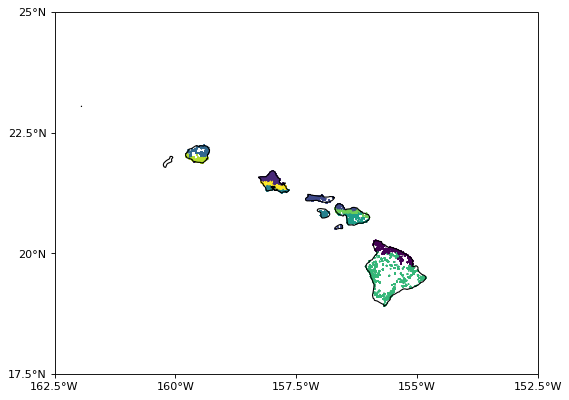

In [394]:
import cartopy.mpl.ticker as cticker

plt.figure(figsize=(8, 6), dpi=80)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([197.5, 207, 18, 23], ccrs.PlateCarree())
# ax.set_xticks(np.arange(200, 207, 2.5))
# ax.set_xticks([-160, -162.5, -165])
# ax.set_xticks([200, 197.5])
ax.set_xticks([-162.5, -160, -157.5, -155, -152.5], crs=ccrs.PlateCarree())
ax.set_yticks([17.5, 20, 22.5, 25])

lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=2, color='black', linestyle='--')
# ax.set_xticks([205, 203], crs=ccrs.PlateCarree())


#plt.scatter(df_for_kmean["Lon_DD"], df_data_original["Lat_DD"], s=0.2, marker='o', c=df_data_clean["skn_class"])
plt.scatter(df_for_kmeans["Lon_DD"], df_for_kmeans["Lat_DD"], s=0.2, marker='o', c=label)


ax.coastlines(resolution='10m')

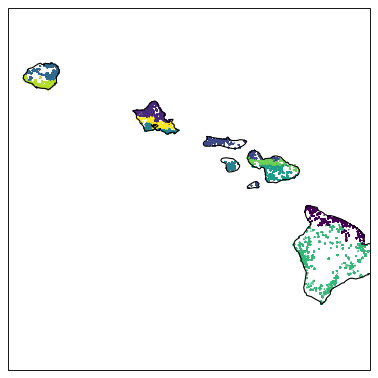

In [397]:
import cartopy.mpl.ticker as cticker

plt.figure(figsize=(8, 6), dpi=80)

ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([197.5, 207, 18, 23], ccrs.PlateCarree())
# ax.set_extent([197.5-360, -150, 18, 23], ccrs.PlateCarree())
ax.set_xlim(-160, -155)
ax.set_ylim(18, 23)
#ax.set_xticks([-160, -157.5, -155, -152.5], crs=ccrs.PlateCarree())
#ax.set_yticks([17.5, 20, 22.5, 25])

lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=2, color='black', linestyle='--')

plt.scatter(df_for_kmeans["Lon_DD"], df_for_kmeans["Lat_DD"], s=0.2, marker='o', c=label)


ax.coastlines(resolution='10m')

In [406]:
df_data_by_year = pd.read_excel(f"{base_dir}/FilledDataset2012.xlsx", sheet_name="Data_in")
df_data_by_year = df_data_by_year.replace(r'^\s*$', np.nan, regex=True).dropna()

In [408]:
df_data_by_year

,SKN,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
5,1.0,1925,1.2,0.67,4.90,0.39,0.03,2.18,0.10,0.16,0.08,0.22,0.93,0.710000
6,1.0,1926,0.96,0.11,0.07,0.00,0.90,0.17,0.00,2.05,0,0.05,0.1,0.570000
7,1.0,1927,0.12,0.02,1.94,4.61,0.04,0.44,0.00,0.02,3.56,0.72,0.07,10.860000
8,1.0,1928,0.01,0,0.50,0.61,0.02,0.13,1.50,0,0.03,0.02,0,0.800000
9,1.0,1929,4.34,2.76,0.80,0.04,0.13,0,0.00,1,1,0,12.88,0.860000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196879,1145.0,2011,4.37,4.33,3.21,2.48,5.39,2.97,1.86,2.09,0.86,2.62,3.4,2.440000
196880,1145.0,2012,0.16,0.9,4.77,1.23,1.05,1.31,2.65,1.46,1.14,0.29,0.46,3.870000
196968,1146.0,2007,2.73,5.0,4.67,1.56,1.84,1.31,3.99,1.77,2.39,1.27,5.95,7.680000
196969,1146.0,2008,1.65,1.49,0.62,3.39,1.61,2.0,2.59,2.25,2.11,3.24,2.47,6.344667


In [411]:
df_locations = pd.read_csv(f"{base_dir}/SKNlocations.csv")

In [415]:
df_data_by_year

,SKN,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
5,1.0,1925,1.2,0.67,4.90,0.39,0.03,2.18,0.10,0.16,0.08,0.22,0.93,0.710000
6,1.0,1926,0.96,0.11,0.07,0.00,0.90,0.17,0.00,2.05,0,0.05,0.1,0.570000
7,1.0,1927,0.12,0.02,1.94,4.61,0.04,0.44,0.00,0.02,3.56,0.72,0.07,10.860000
8,1.0,1928,0.01,0,0.50,0.61,0.02,0.13,1.50,0,0.03,0.02,0,0.800000
9,1.0,1929,4.34,2.76,0.80,0.04,0.13,0,0.00,1,1,0,12.88,0.860000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196879,1145.0,2011,4.37,4.33,3.21,2.48,5.39,2.97,1.86,2.09,0.86,2.62,3.4,2.440000
196880,1145.0,2012,0.16,0.9,4.77,1.23,1.05,1.31,2.65,1.46,1.14,0.29,0.46,3.870000
196968,1146.0,2007,2.73,5.0,4.67,1.56,1.84,1.31,3.99,1.77,2.39,1.27,5.95,7.680000
196969,1146.0,2008,1.65,1.49,0.62,3.39,1.61,2.0,2.59,2.25,2.11,3.24,2.47,6.344667


In [416]:
df_data_by_year = df_data_by_year.merge(right=df_locations, left_on="SKN", right_on="SKN")

In [417]:
df_data_by_year

,SKN,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Name,Lat_DD,Lon_DD
0,1.0,1925,1.2,0.67,4.90,0.39,0.03,2.18,0.10,0.16,0.08,0.22,0.93,0.710000,KALAE,18.916176,-155.674994
1,1.0,1926,0.96,0.11,0.07,0.00,0.90,0.17,0.00,2.05,0,0.05,0.1,0.570000,KALAE,18.916176,-155.674994
2,1.0,1927,0.12,0.02,1.94,4.61,0.04,0.44,0.00,0.02,3.56,0.72,0.07,10.860000,KALAE,18.916176,-155.674994
3,1.0,1928,0.01,0,0.50,0.61,0.02,0.13,1.50,0,0.03,0.02,0,0.800000,KALAE,18.916176,-155.674994
4,1.0,1929,4.34,2.76,0.80,0.04,0.13,0,0.00,1,1,0,12.88,0.860000,KALAE,18.916176,-155.674994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87739,1145.0,2011,4.37,4.33,3.21,2.48,5.39,2.97,1.86,2.09,0.86,2.62,3.4,2.440000,PUU AUAU,22.182760,-159.332203
87740,1145.0,2012,0.16,0.9,4.77,1.23,1.05,1.31,2.65,1.46,1.14,0.29,0.46,3.870000,PUU AUAU,22.182760,-159.332203
87741,1146.0,2007,2.73,5.0,4.67,1.56,1.84,1.31,3.99,1.77,2.39,1.27,5.95,7.680000,Moloaa Dairy,22.183333,-159.337500
87742,1146.0,2008,1.65,1.49,0.62,3.39,1.61,2.0,2.59,2.25,2.11,3.24,2.47,6.344667,Moloaa Dairy,22.183333,-159.337500


In [475]:
model = KMeans(n_clusters=10)
X = df_data_by_year.drop(labels=["Name", "Lat_DD", "Lon_DD", "Year"], axis=1).to_numpy()
label = model.fit_predict(X)

In [476]:
X.shape, label.shape

((87744, 13), (87744,))

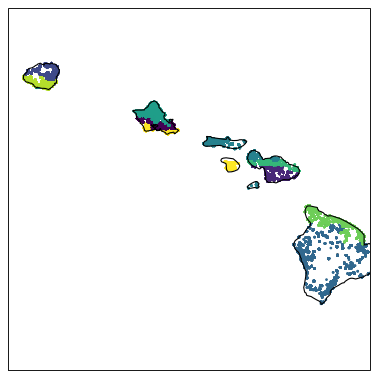

In [478]:
import cartopy.mpl.ticker as cticker

plt.figure(figsize=(8, 6), dpi=80)

ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([197.5, 207, 18, 23], ccrs.PlateCarree())
# ax.set_extent([197.5-360, -150, 18, 23], ccrs.PlateCarree())
ax.set_xlim(-160, -155)
ax.set_ylim(18, 23)
#ax.set_xticks([-160, -157.5, -155, -152.5], crs=ccrs.PlateCarree())
#ax.set_yticks([17.5, 20, 22.5, 25])

lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=2, color='black', linestyle='--')

plt.scatter(df_data_by_year["Lon_DD"], df_data_by_year["Lat_DD"], s=2, marker='o', c=label)


ax.coastlines(resolution='10m')

In [513]:
df_data_by_year

,SKN,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Name,Lat_DD,Lon_DD
0,1.0,1925,1.2,0.67,4.90,0.39,0.03,2.18,0.10,0.16,0.08,0.22,0.93,0.710000,KALAE,18.916176,-155.674994
1,1.0,1926,0.96,0.11,0.07,0.00,0.90,0.17,0.00,2.05,0,0.05,0.1,0.570000,KALAE,18.916176,-155.674994
2,1.0,1927,0.12,0.02,1.94,4.61,0.04,0.44,0.00,0.02,3.56,0.72,0.07,10.860000,KALAE,18.916176,-155.674994
3,1.0,1928,0.01,0,0.50,0.61,0.02,0.13,1.50,0,0.03,0.02,0,0.800000,KALAE,18.916176,-155.674994
4,1.0,1929,4.34,2.76,0.80,0.04,0.13,0,0.00,1,1,0,12.88,0.860000,KALAE,18.916176,-155.674994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87739,1145.0,2011,4.37,4.33,3.21,2.48,5.39,2.97,1.86,2.09,0.86,2.62,3.4,2.440000,PUU AUAU,22.182760,-159.332203
87740,1145.0,2012,0.16,0.9,4.77,1.23,1.05,1.31,2.65,1.46,1.14,0.29,0.46,3.870000,PUU AUAU,22.182760,-159.332203
87741,1146.0,2007,2.73,5.0,4.67,1.56,1.84,1.31,3.99,1.77,2.39,1.27,5.95,7.680000,Moloaa Dairy,22.183333,-159.337500
87742,1146.0,2008,1.65,1.49,0.62,3.39,1.61,2.0,2.59,2.25,2.11,3.24,2.47,6.344667,Moloaa Dairy,22.183333,-159.337500


In [538]:
df_aggregated_by_station = df_data_by_year.groupby("SKN").agg(["mean"]).iloc[:, 1:13]

In [539]:
X = df_aggregated_by_station.to_numpy()

In [541]:
df_aggregated_by_station

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
SKN,,,,,,,,,,,,
1.0,2.755652,1.947391,2.936328,1.201739,0.444783,0.497826,0.433043,0.946087,0.847391,0.895217,2.056522,2.024348
1.1,0.405000,0.365000,2.485000,0.725000,0.565000,0.535000,0.615000,2.060000,4.705000,2.945000,2.740000,0.695000
1.2,2.913333,2.700000,1.520000,2.120000,1.210000,1.186667,1.190000,0.863333,1.553333,1.800000,3.610000,7.053333
2.0,3.344725,2.898132,3.242308,3.485891,3.563297,2.189208,4.236923,2.441094,3.105385,2.093956,2.691429,2.464835
2.1,1.040000,4.230000,0.545000,0.565000,0.320000,0.425000,0.960000,1.400000,0.985000,0.455000,3.880000,7.270000
...,...,...,...,...,...,...,...,...,...,...,...,...
1142.0,7.217955,5.361477,6.917614,5.166250,4.305341,2.090455,3.159659,2.945114,2.704205,5.418409,6.674318,6.384091
1143.0,6.627841,4.674659,5.382727,4.865341,4.055795,2.201477,2.641591,2.862614,2.625568,4.528068,5.530114,5.580909


In [533]:
model = KMeans(n_clusters=10)
label = model.fit_predict(X)

In [542]:
df_aggregated_by_station["label"] = label

In [547]:
df_temp = df_locations.merge(right=df_aggregated_by_station, left_on="SKN", right_on="SKN")

In [548]:
df_temp

,SKN,Name,Lat_DD,Lon_DD,"(Jan, mean)","(Feb, mean)","(Mar, mean)","(Apr, mean)","(May, mean)","(Jun, mean)","(Jul, mean)","(Aug, mean)","(Sep, mean)","(Oct, mean)","(Nov, mean)","(Dec, mean)","(label, )"
0,1.0,KALAE,18.916176,-155.674994,2.755652,1.947391,2.936328,1.201739,0.444783,0.497826,0.433043,0.946087,0.847391,0.895217,2.056522,2.024348,0
1,1.1,MORSE FIELD,18.913680,-155.680550,0.405000,0.365000,2.485000,0.725000,0.565000,0.535000,0.615000,2.060000,4.705000,2.945000,2.740000,0.695000,0
2,1.2,KALAE S TRK STA,18.938669,-155.680549,2.913333,2.700000,1.520000,2.120000,1.210000,1.186667,1.190000,0.863333,1.553333,1.800000,3.610000,7.053333,0
3,2.0,MANUKA,19.108660,-155.825545,3.344725,2.898132,3.242308,3.485891,3.563297,2.189208,4.236923,2.441094,3.105385,2.093956,2.691429,2.464835,0
4,2.1,KAHUKU MAUKA 2.10,19.108890,-155.746670,1.040000,4.230000,0.545000,0.565000,0.320000,0.425000,0.960000,1.400000,0.985000,0.455000,3.880000,7.270000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1142.0,CAMP 1,22.177772,-159.338870,7.217955,5.361477,6.917614,5.166250,4.305341,2.090455,3.159659,2.945114,2.704205,5.418409,6.674318,6.384091,2
1896,1143.0,FIELD 30,22.202190,-159.347203,6.627841,4.674659,5.382727,4.865341,4.055795,2.201477,2.641591,2.862614,2.625568,4.528068,5.530114,5.580909,5
1897,1144.0,FIELD 7-A,22.186077,-159.318870,6.327273,4.583409,5.688636,4.161250,3.577386,1.769432,2.358977,2.405682,2.035114,4.884318,5.326818,5.387500,5
1898,1145.0,PUU AUAU,22.182760,-159.332203,6.019670,4.764835,5.536264,4.529890,3.640659,1.882637,2.627692,2.371978,2.197802,4.670220,5.368791,5.262857,5


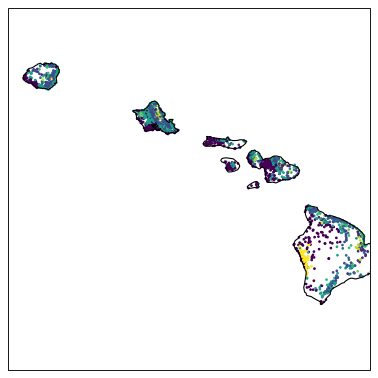

In [549]:
import cartopy.mpl.ticker as cticker

plt.figure(figsize=(8, 6), dpi=80)

ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([197.5, 207, 18, 23], ccrs.PlateCarree())
# ax.set_extent([197.5-360, -150, 18, 23], ccrs.PlateCarree())
ax.set_xlim(-160, -155)
ax.set_ylim(18, 23)
#ax.set_xticks([-160, -157.5, -155, -152.5], crs=ccrs.PlateCarree())
#ax.set_yticks([17.5, 20, 22.5, 25])

lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=2, color='black', linestyle='--')

plt.scatter(df_temp["Lon_DD"], df_temp["Lat_DD"], s=2, marker='o', c=label)


ax.coastlines(resolution='10m')